In [1]:
import pandas as pd
import numpy as np
import requests
import json
from sodapy import Socrata

client = Socrata("data.cityofnewyork.us", None)
results = client.get("43nn-pn8j", limit=20000)
results_df = pd.DataFrame.from_records(results)
results_df.count()

action                   20000
boro                     20000
building                 19949
camis                    20000
critical_flag            20000
cuisine_description      20000
dba                      20000
grade                    10544
grade_date               10544
inspection_date          20000
inspection_type          20000
phone                    20000
record_date              20000
score                    19244
street                   20000
violation_code           19762
violation_description    19671
zipcode                  19585
dtype: int64

In [105]:
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
results_df.to_csv('Outputs/smallpractice_data.csv', index=True)

# Step 1: Drop useless columns 

In [3]:
results_df.columns

Index(['action', 'boro', 'building', 'camis', 'critical_flag',
       'cuisine_description', 'dba', 'grade', 'grade_date', 'inspection_date',
       'inspection_type', 'phone', 'record_date', 'score', 'street',
       'violation_code', 'violation_description', 'zipcode'],
      dtype='object')

In [4]:
newresultsdf= results_df.drop(columns=['camis','building','grade_date','violation_description'])

In [5]:
newresults2 = newresultsdf.drop(columns=['inspection_type','phone','record_date','score','violation_code','street'])

In [6]:
newresults2.to_csv('Outputs/small_practice_cleaned_data.csv', index=True)
newresults2.head()

,action,boro,critical_flag,cuisine_description,dba,grade,inspection_date,zipcode
0,Violations were cited in the following area(s).,BRONX,Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
1,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
2,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
3,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462
4,Violations were cited in the following area(s).,BRONX,Not Critical,Bakery,MORRIS PARK BAKE SHOP,NaN,2019-05-16T00:00:00.000,10462


In [7]:
#clean data: change column headings, add index, fix timestamp to YYMMDD, Count inspections per year
#combine cuisines if desired? --Not desired, only 57 types.
newresults2.describe()

,action,boro,critical_flag,cuisine_description,dba,grade,inspection_date,zipcode
count,20000,20000,20000,20000,20000,10544,20000,19585
unique,5,5,3,57,1065,5,1078,169
top,Violations were cited in the following area(s).,MANHATTAN,Critical,American,MCDONALD'S,A,2019-05-16T00:00:00.000,10003
freq,19003,10169,10774,6512,347,8751,66,808


In [8]:
countboro = newresults2["boro"].value_counts()
countboro

MANHATTAN        10169
QUEENS            4132
BROOKLYN          3287
BRONX             1298
STATEN ISLAND     1114
Name: boro, dtype: int64

In [31]:
countaction = newresults2["action"].value_counts()
countaction

Violations were cited in the following area(s).                                                                                        19003
Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.      563
No violations were recorded at the time of this inspection.                                                                              230
Establishment re-opened by DOHMH                                                                                                         167
Establishment re-closed by DOHMH                                                                                                          37
Name: action, dtype: int64

In [9]:
countgrade = newresults2["grade"].value_counts()
countgrade

A    8751
B    1151
C     383
Z     156
P     103
Name: grade, dtype: int64

In [10]:
countcuisine = newresults2["cuisine_description"].value_counts()
countcuisine.head()

American         6512
Italian          2133
Pizza            1162
Bakery            805
Pizza/Italian     762
Name: cuisine_description, dtype: int64

In [11]:
countdba = newresults2["dba"].value_counts()
countdba.head()

MCDONALD'S                 347
WHITE CASTLE               145
STARBUCKS                  127
BURGER KING                103
ALFONSO'S PASTRY SHOPPE     79
Name: dba, dtype: int64

In [12]:
countcrit = newresults2["critical_flag"].value_counts()
countcrit

Critical          10774
Not Critical       8897
Not Applicable      329
Name: critical_flag, dtype: int64

In [13]:
newresults2.columns

Index(['action', 'boro', 'critical_flag', 'cuisine_description', 'dba',
       'grade', 'inspection_date', 'zipcode'],
      dtype='object')

In [98]:
final = newresults2.rename(columns={"action": "Action",
                                    "boro": "Borough",
                                    "critical_flag": "Critical_Violations",
                                    "cuisine_description": "Cuisine",
                                    "dba": "Name",
                                    "grade": "Grade",
                                    "inspection_date": "Inspection",
                                    "zipcode": "Zip_Code"
                                   })
final_df = final[['Name','Borough','Zip_Code','Cuisine','Inspection','Grade','Critical_Violations','Action']]
final_df.head()


,Name,Borough,Zip_Code,Cuisine,Inspection,Grade,Critical_Violations,Action
0,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Critical,Violations were cited in the following area(s).
1,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).
2,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).
3,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).
4,MORRIS PARK BAKE SHOP,BRONX,10462,Bakery,2019-05-16T00:00:00.000,NaN,Not Critical,Violations were cited in the following area(s).


In [102]:
final_df['Inspect'] = pd.to_datetime(final_df['Inspection'], errors='coerce')
final_df['Inspect'] = final_df['Inspect'].dt.strftime('%Y')
countyear = final_df['Inspect'].value_counts()
dyear = countyear.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True)
dyear

C:\Users\Work\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Work\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2014       9
2015     624
2016    4408
2017    5209
2018    6574
2019    3176
Name: Inspect, dtype: int64

In [16]:
# Bar Graph 1: count of most popular restaurants names
# groupby dba, bargraph with top 10 counted restaurant names
# delete null values in restaurant names

In [17]:
# BarGraph 2: count of restaurants per borough
# delete restaurants that don't have an assigned borough

In [18]:
# Graph 3: heatmap of restaurant density by zipcode
## delete restaurants that don't have an assigned zipcode

In [19]:
# Graph 4: scatter plot, Y= grades, x = cuisines
## Bin grades into integers (6=A, 5=B, 4=C, etc), and average them per cuisine. Label points.


In [20]:
# Graph 4b: scatter plot, Y= closures, x = cuisines
# count of closures by cuisine. Label points.

In [21]:
# Graph 5: heatmap of inspections per zipcode
# delete entries without inspections or zipcodes

In [22]:
# Graph 6: Bargraph of closures and reclosures by borough
# count closures, count reclosures, group by borough

In [23]:
# Graph 6b: heatmap of re/closures by zipcode
# restates graph 6

In [24]:
# Graph 7: heatmap of critical violations by zipcode or scatterplot by cuisine
# describes which areas or cuisines are the most dangerous, as critical violations led foodborne illness

In [25]:
# Graph 8: heatmap of grades by zipcode or scatterplot by cuisine
# describes best and worst zipcodes, shows good/bad restaurants by cuisine

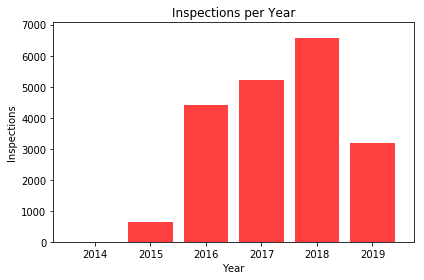

In [103]:
#Graph 9: bargraph showing inspections per year, closures per year
import matplotlib.pyplot as plt
x_axis = np.arange(0, len(dyear))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("Inspections per Year")
plt.xlabel("Year")
plt.ylabel("Inspections")

plt.xlim(-0.75, len(dyear)-.25)
plt.ylim(0, max(dyear) + 500)

plt.bar(x_axis, dyear, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, dyear.index)

plt.tight_layout()
plt.show()

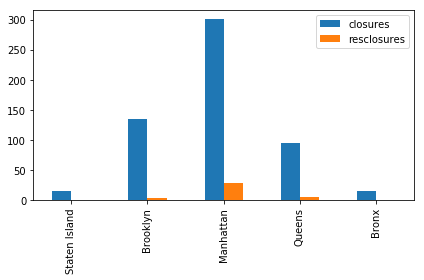

In [94]:
#Graph 9b: bargraph showing closures per year
# Converting the "duration (seconds)" column's values to numeric
converted_ufo = final_df.copy()
usa_ufo_df = converted_ufo.loc[converted_ufo['Action'] == 
                               "Establishment Closed by DOHMH.  Violations were cited in the following area(s) and those requiring immediate action were addressed.", :]
usa_ufo_df2 = converted_ufo.loc[converted_ufo['Action'] == "Establishment re-closed by DOHMH", :]

# Count how many sightings have occured within each state
state_counts = usa_ufo_df["Borough"].value_counts()
state_counts2 = usa_ufo_df2["Borough"].value_counts()
a = pd.concat([state_counts,state_counts2], axis=1, join='outer',sort=True)
b = np.where(np.isnan(a), 0, a)
c = pd.DataFrame(data=b, index=('Staten Island','Brooklyn','Manhattan','Queens','Bronx'), columns=('closures','resclosures'), dtype=None, copy=False)
c.plot.bar()
plt.tight_layout()
plt.show()

In [ ]:
# Analysis??? Opportunities for Regressions, chi-squares?

In [ ]:
# Get input from user about zipcode. Paste list of restaurants names from zipcode. 
# Get information from user about restaurant name. Print restaurant grade.